In [11]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os
print(os.listdir("../Week5"))


['.ipynb_checkpoints', 'column_2C_weka.csv', 'column_3C_weka.csv', 'Week5_KNNAlgorthim.ipynb']


In [12]:
data = pd.read_csv('../Week5/column_2C_weka.csv')

In [13]:
# view data
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [14]:
data['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [16]:
# you split class as abnormal and normal
A = data[data['class'] == 'Abnormal']
N = data[data['class'] == 'Normal']

In [17]:
N.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 210 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          100 non-null    float64
 1   pelvic_tilt numeric       100 non-null    float64
 2   lumbar_lordosis_angle     100 non-null    float64
 3   sacral_slope              100 non-null    float64
 4   pelvic_radius             100 non-null    float64
 5   degree_spondylolisthesis  100 non-null    float64
 6   class                     100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 6.2+ KB


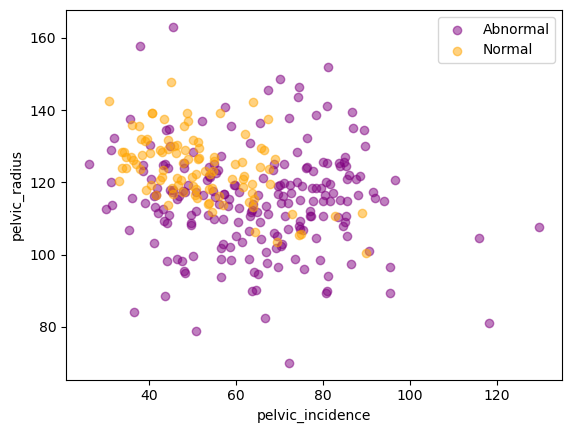

In [18]:
#visualization
plt.scatter(A.pelvic_incidence, A.pelvic_radius, color = 'purple', label = 'Abnormal',alpha = 0.5)
plt.scatter(N.pelvic_incidence, N.pelvic_radius, color = 'orange', label = 'Normal', alpha = 0.5)
plt.xlabel('pelvic_incidence')
plt.ylabel('pelvic_radius')
plt.legend()
plt.show()

In [19]:
# abnormal and normal are string. So you transform integer or float.
data['class'] = [0 if each == 'Abnormal' else 1 for each in data['class']]

In [20]:
# determine feature and feature class.
y = data['class'].values
x_data = data.drop(['class'], axis=1)

In [21]:
# normalization
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
# (x-min(x))/(max(x)-min(x))

C:\Users\mohan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\mohan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\mohan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [22]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [23]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

In [24]:
print('{} nın score: {}'.format(3,knn.score(x_test,y_test)))

3 nın score: 0.8064516129032258


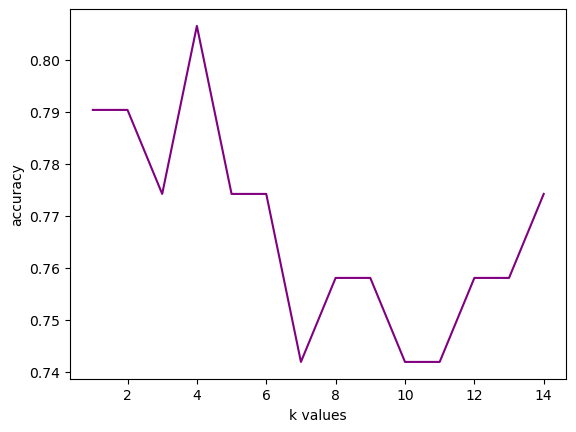

In [25]:
# find the most appropriate k value
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list,color='purple')
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()